In [569]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [570]:
#I have defined the dat class in Data_prep.py code to get data from file and prepare for analysis
from Data_prep import dat

In [571]:
#In this analysis we are using the following data https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
#we are trying to predict car prices based on different features
datobj=dat("Car_details_v3_cleaned.csv","selling_price",0.2,42)
df=datobj.df

In [572]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6267 non-null   int64  
 1   year                          6267 non-null   int64  
 2   selling_price                 6267 non-null   int64  
 3   km_driven                     6267 non-null   int64  
 4   mileage                       6267 non-null   float64
 5   engine                        6267 non-null   float64
 6   max_power                     6267 non-null   float64
 7   fuel_Petrol                   6267 non-null   bool   
 8   seller_type_Individual        6267 non-null   bool   
 9   transmission_Manual           6267 non-null   bool   
 10  owner_Second Owner            6267 non-null   bool   
 11  owner_Third and above owners  6267 non-null   bool   
 12  seat_category_more than 5     6267 non-null   bool   
dtypes: 

In [573]:
df=df.astype(float)

In [574]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6267 non-null   float64
 1   year                          6267 non-null   float64
 2   selling_price                 6267 non-null   float64
 3   km_driven                     6267 non-null   float64
 4   mileage                       6267 non-null   float64
 5   engine                        6267 non-null   float64
 6   max_power                     6267 non-null   float64
 7   fuel_Petrol                   6267 non-null   float64
 8   seller_type_Individual        6267 non-null   float64
 9   transmission_Manual           6267 non-null   float64
 10  owner_Second Owner            6267 non-null   float64
 11  owner_Third and above owners  6267 non-null   float64
 12  seat_category_more than 5     6267 non-null   float64
dtypes: 

In [575]:
df.describe()

,Unnamed: 0,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6267.000000,6267.000000,6.267000e+03,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000,6267.000000
mean,3965.220520,2013.599968,4.504369e+05,73702.630445,19.699196,1399.672730,84.586747,0.459550,0.908409,0.938886,0.284666,0.097974,0.191320
std,2357.112047,3.679598,2.541364e+05,47875.436535,3.831312,460.545875,25.625692,0.498401,0.288471,0.239558,0.451291,0.297303,0.393371
min,0.000000,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1919.500000,2011.000000,2.500000e+05,40000.000000,17.000000,1197.000000,68.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,3869.000000,2014.000000,4.000000e+05,70000.000000,19.700000,1248.000000,81.800000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,6002.500000,2017.000000,6.050000e+05,100000.000000,22.540000,1498.000000,98.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
max,8125.000000,2020.000000,1.295000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [576]:
df_corr=df.corr()
df_corr["selling_price"].nsmallest(1)

fuel_Petrol   -0.322558
Name: selling_price, dtype: float64

In [577]:
df_corr["selling_price"].nlargest(2)

selling_price    1.000000
year             0.629347
Name: selling_price, dtype: float64

<Axes: xlabel='max_power', ylabel='selling_price'>

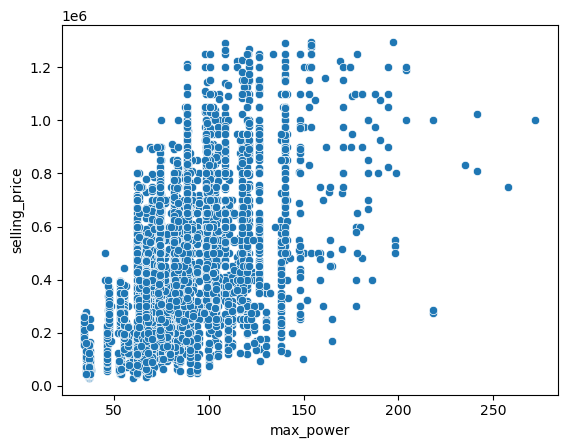

In [578]:
#The highest correlation of "selling_price" is with "max_power" feature
sns.scatterplot(data=df,y="selling_price",x="max_power")

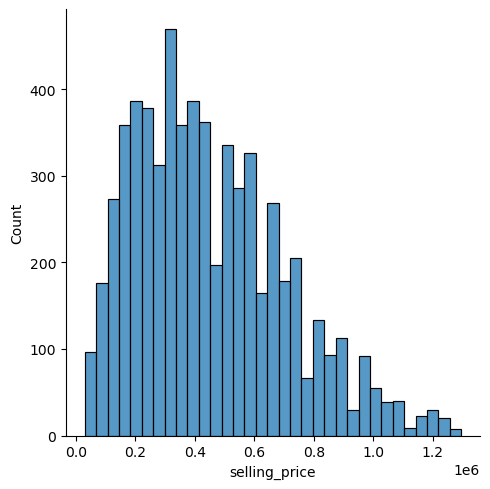

In [579]:
sns.displot(data=df,x="selling_price")

In [580]:
X_test

array([[ 0.23367754, -0.98428203,  2.2519548 , ..., -0.62217819,
        -0.32615684, -0.48793799],
       [-1.35989388,  0.64596218,  0.98872361, ..., -0.62217819,
        -0.32615684,  2.04944077],
       [ 1.08361064,  1.46108429, -1.32720025, ...,  1.6072566 ,
        -0.32615684, -0.48793799],
       ...,
       [-1.63285889, -0.44086729,  2.14668554, ..., -0.62217819,
         3.06600961, -0.48793799],
       [ 0.18605748,  0.10254745, -0.90612318, ..., -0.62217819,
        -0.32615684, -0.48793799],
       [ 1.16949683, -0.98428203,  2.16904473, ..., -0.62217819,
        -0.32615684, -0.48793799]])

In [581]:
# Split data into training and test samples and Scale feature data using Standard Scaler
datobj.scale_dat()
X_train=datobj.X_train
X_test=datobj.X_test
y_train=datobj.y_train
y_test=datobj.y_test

In [582]:
lr_model=LinearRegression()
#lr_model=ElasticNet()

In [583]:
lr_model.fit(X_train,y_train)

LinearRegression()

In [584]:
lr_preds=lr_model.predict(X_test)

In [585]:
lr_preds

array([255900.87932857, 577287.30009656, 727862.20191257, ...,
       285748.09953829, 427510.22814767, 262208.7773795 ])

In [586]:
mean_absolute_error(y_test,lr_preds)

np.float64(103639.67558331766)

In [587]:
np.sqrt(mean_squared_error(y_test,lr_preds))

np.float64(135721.8165661137)

In [588]:
#Where mean selling price is 409772.392107

In [589]:
y_test_list=y_test.tolist()

In [590]:
residuals=[lr_preds[i]-y_test_list[i] for i in range(0,len(y_test_list))]

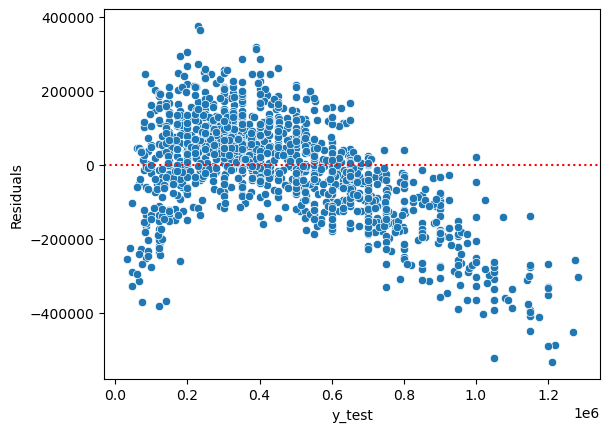

In [591]:
#Checking Homoscedasticity
sns.scatterplot(x=y_test_list,y=residuals)
plt.ylabel("Residuals")
plt.xlabel("y_test")
plt.axhline(y=0,color='r',linestyle=':')
# There is a difference between variations in one part of 
#the data and the other

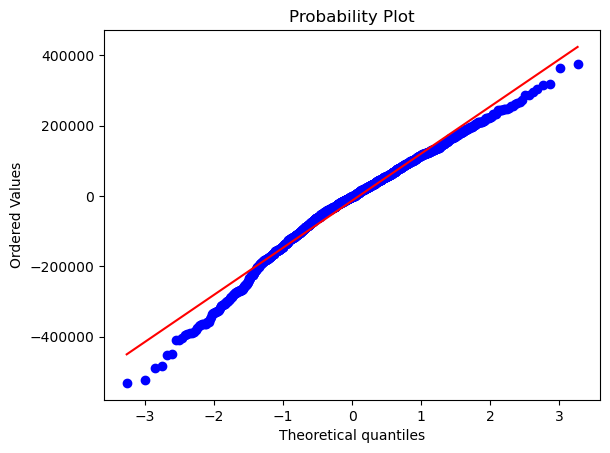

In [592]:
#Checking Normality
stats.probplot(residuals, dist="norm", plot=plt)
plt.show()

#distribution is normal since points lie approximately at 45 degree reference line

# With outliers in car sales price 

In [593]:
# We are including  1.3*10^6<price<4*10^6, this gives us 4% more statistics 

In [594]:
datobj_wide=dat("Car_details_v3_cleaned_wide.csv","selling_price",0.2,101)
df_wide=datobj_wide.df

In [595]:
df_wide=df_wide.astype(float)

In [596]:
df_wide.describe()

,Unnamed: 0,year,selling_price,km_driven,mileage,engine,max_power,fuel_Petrol,seller_type_Individual,transmission_Manual,owner_Second Owner,owner_Third and above owners,seat_category_more than 5
count,6533.000000,6533.000000,6.533000e+03,6533.000000,6533.000000,6533.000000,6533.000000,6533.000000,6533.00000,6533.000000,6533.000000,6533.000000,6533.000000
mean,3952.306750,2013.716516,5.123306e+05,72729.924690,19.516456,1434.735344,87.872490,0.445125,0.89775,0.917037,0.280576,0.094291,0.203429
std,2363.048801,3.671629,4.103663e+05,47631.992195,3.897205,489.787050,30.371216,0.497018,0.30300,0.275848,0.449315,0.292255,0.402580
min,0.000000,2001.000000,3.000000e+04,1000.000000,9.000000,624.000000,34.200000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,1906.000000,2011.000000,2.500000e+05,38000.000000,16.900000,1197.000000,68.000000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000
50%,3861.000000,2014.000000,4.250000e+05,68240.000000,19.610000,1248.000000,81.860000,0.000000,1.00000,1.000000,0.000000,0.000000,0.000000
75%,5996.000000,2017.000000,6.500000e+05,100000.000000,22.540000,1498.000000,100.000000,1.000000,1.00000,1.000000,1.000000,0.000000,0.000000
max,8125.000000,2020.000000,3.975000e+06,475000.000000,28.400000,3498.000000,272.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000


In [608]:
df_wide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6533 entries, 0 to 6532
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    6533 non-null   float64
 1   year                          6533 non-null   float64
 2   selling_price                 6533 non-null   float64
 3   km_driven                     6533 non-null   float64
 4   mileage                       6533 non-null   float64
 5   engine                        6533 non-null   float64
 6   max_power                     6533 non-null   float64
 7   fuel_Petrol                   6533 non-null   float64
 8   seller_type_Individual        6533 non-null   float64
 9   transmission_Manual           6533 non-null   float64
 10  owner_Second Owner            6533 non-null   float64
 11  owner_Third and above owners  6533 non-null   float64
 12  seat_category_more than 5     6533 non-null   float64
dtypes: 

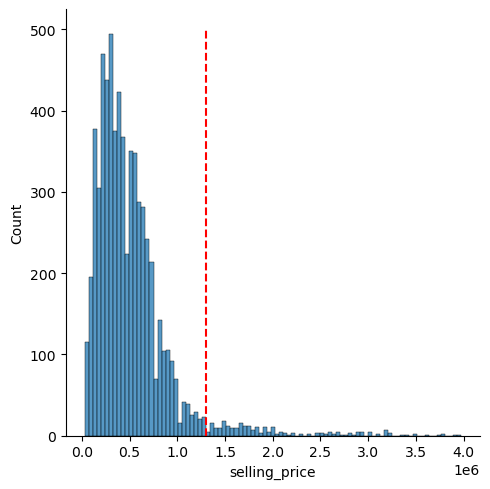

In [597]:
sns.displot(data=df_wide,x="selling_price")
plt.vlines(x=1300000,ymin=0,ymax=500, color='red', linestyle='--')

In [598]:
# Split data into training and test samples and Scale feature data using Standard Scaler
datobj_wide.scale_dat()
X_train_wide=datobj_wide.X_train
X_test_wide=datobj_wide.X_test
y_train_wide=datobj_wide.y_train
y_test_wide=datobj_wide.y_test

In [609]:
X_train_wide

array([[ 0.80509548,  1.17107971, -0.89050825, ...,  1.60074114,
        -0.32670236, -0.50740427],
       [ 0.86171602,  0.0834553 , -0.38875216, ..., -0.62471063,
        -0.32670236, -0.50740427],
       [ 0.9834079 ,  0.8991736 ,  0.52859143, ..., -0.62471063,
        -0.32670236,  1.9708151 ],
       ...,
       [-1.00887422,  1.17107971, -1.3078905 , ..., -0.62471063,
        -0.32670236, -0.50740427],
       [-0.91802785,  0.0834553 ,  3.01201587, ...,  1.60074114,
        -0.32670236,  1.9708151 ],
       [ 0.88368816,  0.6272675 , -0.78616268, ..., -0.62471063,
        -0.32670236, -0.50740427]])

In [599]:
lr_model_wide=LinearRegression()
#lr_model_wide=ElasticNet()
lr_model_wide.fit(X_train_wide,y_train_wide)

LinearRegression()

In [600]:
lr_preds_wide=lr_model_wide.predict(X_test_wide)

In [601]:
mean_absolute_error(y_test_wide,lr_preds_wide)

np.float64(144633.86240802132)

In [602]:
np.sqrt(mean_squared_error(y_test_wide,lr_preds_wide))

np.float64(220695.72310437163)

In [603]:
# mean price is 4.504369e+05	(450000)

In [604]:
y_test_list_wide=y_test_wide.tolist()

In [605]:
residuals_wide=[lr_preds_wide[i]-y_test_list_wide[i] for i in range(0,len(y_test_list_wide))]

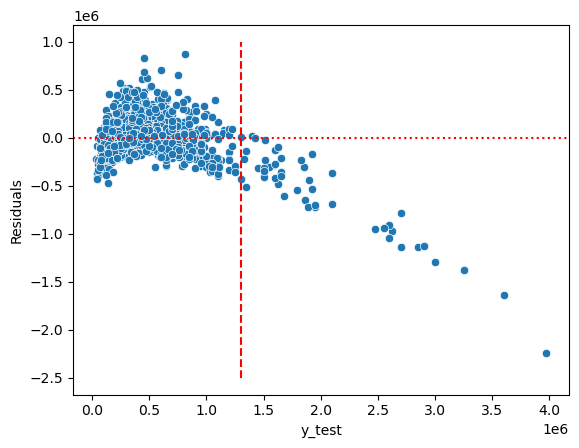

In [606]:
#Checking Homoscedasticity
sns.scatterplot(x=y_test_list_wide,y=residuals_wide)
#plt.ylim(-75000,110000)
plt.ylabel("Residuals")
plt.xlabel("y_test")
plt.axhline(y=0,color='r',linestyle=':')
plt.vlines(x=1300000,ymin=-2500000,ymax=1000000, color='red', linestyle='--')
# There is a difference between variations in one part of 
#the data and the other

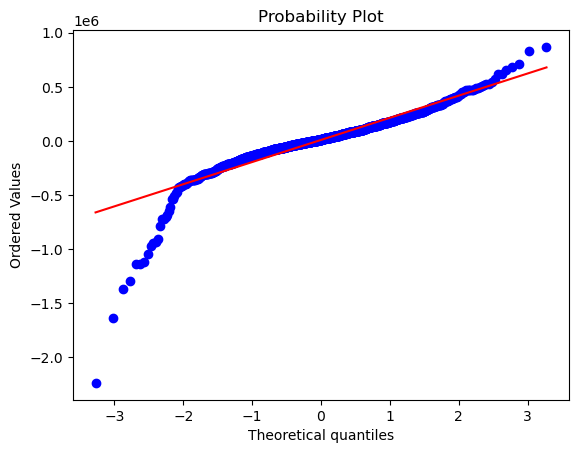

In [607]:
#Checking Normality
stats.probplot(residuals_wide, dist="norm", plot=plt)
plt.show()

#distribution is normal since points lie approximately at 45 degree reference line

# Cross validation with elastic net

In [493]:
#Create an insatnce of ElasticNet model
el_model=ElasticNet()

In [494]:
#Dictionary of model parameters to be used in GridSearch
par_dict={"alpha":[100,10,0.1,0.01],"l1_ratio":[1,0.75,0.5,0.25,0]}

In [495]:
#Creating a GridSearchCV object and fitting training data with linear regression ElasticNet model
grid_model=GridSearchCV( estimator=el_model,param_grid=par_dict,scoring="neg_mean_squared_error", cv=5,verbose=1)
grid_model.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\17573\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.261e+14, tolerance: 2.552e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\17573\anaconda3\envs\erdos_fall_2024\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.272e+14, tolerance: 2.575e+10 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one o

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [100, 10, 0.1, 0.01],
                         'l1_ratio': [1, 0.75, 0.5, 0.25, 0]},
             scoring='neg_mean_squared_error', verbose=1)

In [496]:
#Display fit results
grid_model.best_estimator_

ElasticNet(alpha=0.01, l1_ratio=0.25)

In [497]:
grid_model.best_params_

{'alpha': 0.01, 'l1_ratio': 0.25}

In [498]:
#To see fifferent fit results
df_fitresults=pd.DataFrame(grid_model.cv_results_)

In [499]:
#df_fitresults

In [500]:
#Test model

In [501]:
y_test_pred=grid_model.predict(X_test)

In [502]:
mean_absolute_error(y_test,y_test_pred)

np.float64(103671.37435067269)

In [503]:
np.sqrt(mean_squared_error(y_test,y_test_pred))

np.float64(135772.2026753545)

In [504]:
# we get MAE of $144463 and RMSE of $220702

# Try other regression models

In [505]:
def run_model(model,X_train,y_train,X_test,y_test):

    #Model fit
    model.fit(X_train,y_train)

    #Model predict
    preds=model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,preds))
    mae=mean_absolute_error(y_test,preds)
    print("MAE:{}".format(mae))
    print("RMSE:{}".format(rmse))

## Polynomial regression

In [506]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [507]:
pipe=make_pipeline(PolynomialFeatures(degree=6),LinearRegression())

In [508]:
run_model(pipe,X_train,y_train,X_test,y_test)

MAE:8954449293.397196
RMSE:61484076283.17936


## KNN regressor

In [509]:
from sklearn.neighbors import KNeighborsRegressor

In [511]:
k_values=[1,5,10]

In [512]:
for n in k_values:
    model=KNeighborsRegressor(n_neighbors=n)
    run_model(model,X_train,y_train,X_test,y_test)

MAE:101355.76794258373
RMSE:149182.0548984685
MAE:89684.704784689
RMSE:125500.5824297683
MAE:90345.40861244018
RMSE:126059.34265375226


In [ ]:
#High variance with low k, higher k high bias

## Random Forest Regression

In [526]:
from sklearn.ensemble import RandomForestRegressor

In [527]:
rfr=RandomForestRegressor(n_estimators=10)

In [528]:
run_model(rfr,X_train,y_train,X_test,y_test)

MAE:66498.24346092505
RMSE:93594.25575694254


## Gradient Boost Regressor

In [517]:
from sklearn.ensemble import GradientBoostingRegressor

In [518]:
gboost=GradientBoostingRegressor()

In [519]:
param_grid={"n_estimators":[50,100],"learning_rate":[0.1],"max_depth":[3,5]}

In [520]:
grid=GridSearchCV(gboost,param_grid)

In [521]:
run_model(grid,X_train,y_train,X_test,y_test)

MAE:64433.548281267846
RMSE:90192.3419721113


In [610]:
64433/4.504369e+05	*100

14.304556309662905

## Support Vector Regressor

In [523]:
from sklearn.svm import SVR

In [524]:
svr=SVR()
param_grid={"C":[0.01,0.1,1,5,10,100,1000],"gamma":["auto","scale"]}
grid=GridSearchCV(svr,param_grid)

In [525]:
run_model(grid,X_train,y_train,X_test,y_test)

MAE:131580.7271198917
RMSE:184406.75082336922
